In [31]:
from matplotlib import pyplot
import pandas as pd
import seaborn as sb

In [74]:
ignore_corpora = ['feminisms', 'feminismuncensored', 'fireyfemmes']
weak_powerful_df = pd.read_csv('weak_powerful_wefat.csv', index_col=0).drop(ignore_corpora, axis=1).sort_index()
safe_dangerous_df = pd.read_csv('safe_dangerous_wefat.csv', index_col=0).drop(ignore_corpora, axis=1).sort_index()

In [104]:
def plot_incels_and_feminism(df, incel_corpora, title):
    feminism_df = df.drop(incel_corpora, axis=1)
    incel_df = df[incel_corpora]

    dims = (5, 16)
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=dims)
    sb.heatmap(ax=ax1, data=feminism_df, center=0, vmin=-1, vmax=1, square=True, cbar=False)
    ax1.set_ylabel('target word')
    ax1.set_title('Feminism subreddits')

    sb.heatmap(ax=ax2, data=incel_df, center=0, vmin=-1, vmax=1, square=True, cbar_kws={'label': 'WEFAT score', 'pad': 0.2})
    ax2.set_ylabel('')
    ax2.set_yticks([])
    ax2.set_title('Incel subreddits')
    fig.suptitle(title, )

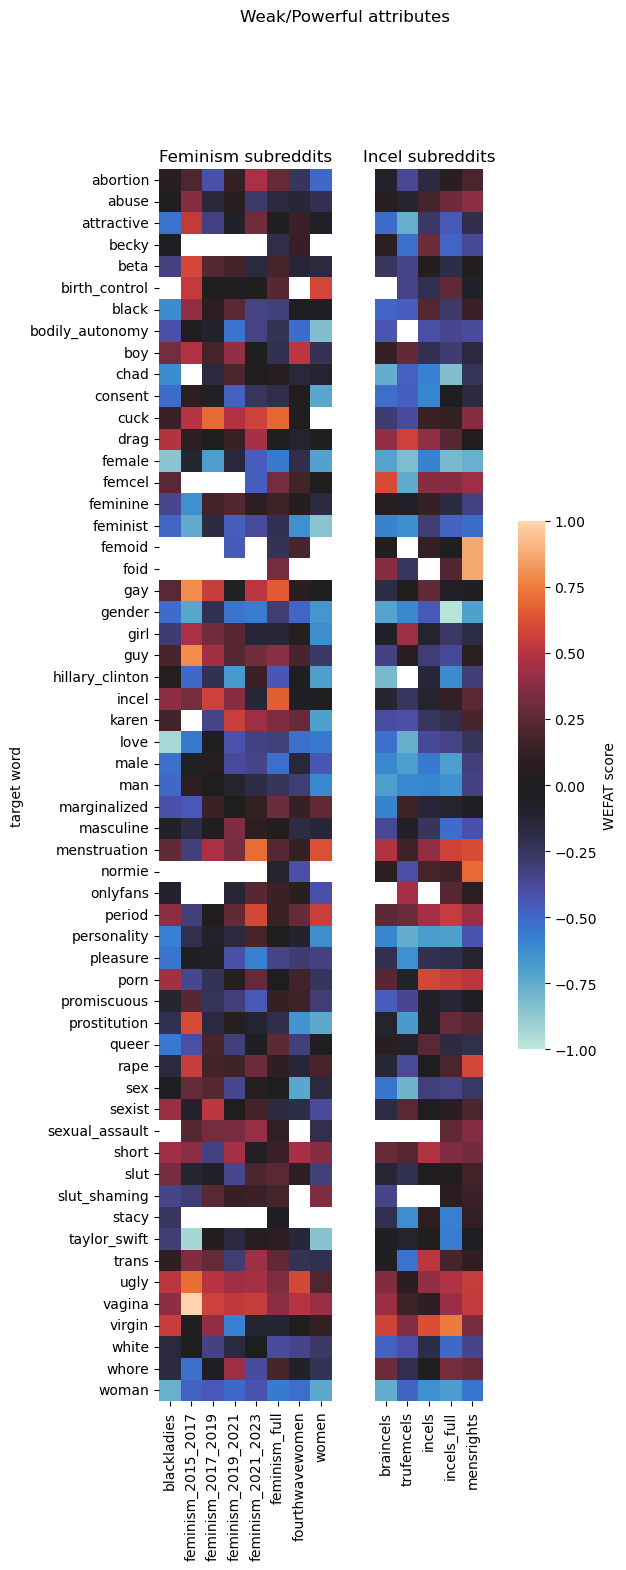

In [105]:
incel_corpora = ['braincels', 'trufemcels', 'incels', 'incels_full', 'mensrights']
plot_incels_and_feminism(weak_powerful_df, incel_corpora, 'Weak/Powerful attributes')

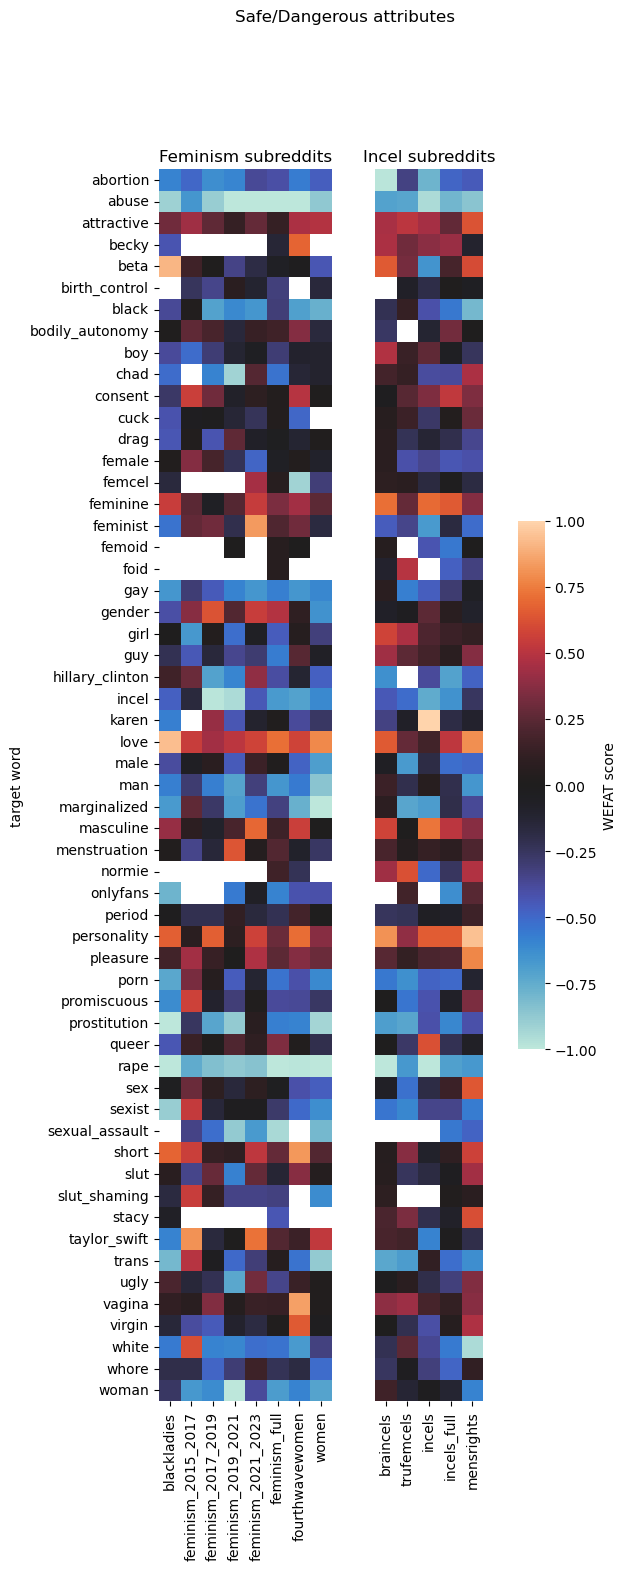

In [107]:
incel_corpora = ['braincels', 'trufemcels', 'incels', 'incels_full', 'mensrights']
plot_incels_and_feminism(safe_dangerous_df, incel_corpora, 'Safe/Dangerous attributes')